In [1]:
import os
import hail as hl
import pyspark
import bokeh
import logging
import random
import pandas as pd
import numpy as np
from scipy import stats
import pickle 
from matplotlib import pyplot as plt
from typing import Any, Counter, List, Optional, Tuple, Union
from hail.plot import show, output_notebook
tmp_dir = "hdfs://spark-master:9820/"
temp_dir = "file:///home/ubuntu/data/tmp"
plot_dir = "/home/ubuntu/data/tmp"

sc = pyspark.SparkContext()
hadoop_config = sc._jsc.hadoopConfiguration()
hadoop_config.set("fs.s3a.access.key", "8YY584J59H7Q6AVKHSU8")
hadoop_config.set("fs.s3a.secret.key", "P8vePa7JUvxKXX2me9ti1cGujgYWMoimAwx4mMlM")
hadoop_config.set("fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem")
hadoop_config.set("fs.AbstractFileSystem.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFS")
hl.init(sc=sc, tmp_dir=tmp_dir, default_reference='GRCh38')
output_notebook()
logging.basicConfig(format="%(levelname)s (%(name)s %(lineno)s): %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jarRunning on Apache Spark version 2.4.5
SparkUI available at http://spark-master:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.41-b8144dba46e6
LOGGING: writing to /home/ubuntu/data/tmp/scripts/sanger_gnomad_hail_qc/notebooks/hail-20201013-1133-0.2.41-b8144dba46e6.log


Loading BokehJS ...

In [2]:
ht=hl.read_table(f'{temp_dir}/ddd-elgh-ukbb/variant_qc/models/aa7a0685/rf_final.ht')

In [3]:
ht.describe()

----------------------------------------
Global fields:
    'feature_medians': dict<tuple (
        str
    ), struct {
        a_index: int32, 
        InbreedingCoeff: float64, 
        n_alt_alleles: int32
    }> 
    'variants_by_strata': dict<tuple (
        str
    ), int64> 
    'features_importance': dict<str, float64> 
    'features': array<str> 
    'test_results': array<struct {
        rf_prediction: str, 
        rf_label: str, 
        n: int32
    }> 
    'rf_hash': str 
    'rf_snv_cutoff': struct {
        min_score: float64
    } 
    'rf_indel_cutoff': struct {
        min_score: float64
    } 
----------------------------------------
Row fields:
    'locus': locus<GRCh38> 
    'alleles': array<str> 
    'a_index': int32 
    'was_split': bool 
    'InbreedingCoeff': float64 
    'variant_type': str 
    'allele_type': str 
    'n_alt_alleles': int32 
    'was_mixed': bool 
    'has_star': bool 
    'AS_QD': array<float64> 
    'AS_MQRankSum': array<float64> 
    'AS

In [4]:
ht.show()

locus,alleles,a_index,was_split,InbreedingCoeff,variant_type,allele_type,n_alt_alleles,was_mixed,has_star,AS_QD,AS_MQRankSum,AS_SOR,AS_ReadPosRankSum,hapmap,omni,mills,kgp_phase1_hc,transmitted_singleton,fp,rf_train,rf_label,rf_test,rf_probability,rf_prediction,ac_raw,ac,filters,rf_positive_label,rf_negative_label
locus<GRCh38>,array<str>,int32,bool,float64,str,str,int32,bool,bool,array<float64>,array<float64>,array<float64>,array<float64>,bool,bool,bool,bool,bool,bool,bool,str,bool,float64,str,int32,int32,set<str>,bool,bool
chr1:13024,"[""G"",""A""]",1,false,-1.47e-01,"""snv""","""snv""",1,false,false,[3.10e+01],NA,NA,NA,NA,NA,NA,NA,NA,true,true,"""FP""",false,3.16e-01,"""FP""",1,1,"{""AC0"",""RF""}",false,true
chr1:13087,"[""A"",""G""]",1,false,-1.26e-01,"""snv""","""snv""",1,false,false,[7.23e+00],NA,NA,NA,NA,NA,NA,NA,NA,false,NA,NA,false,3.17e-01,"""FP""",1,1,"{""RF""}",false,false
chr1:13176,"[""G"",""T""]",1,false,-1.20e-01,"""snv""","""snv""",1,false,false,[1.12e+01],NA,NA,NA,NA,NA,NA,NA,NA,true,true,"""FP""",false,3.17e-01,"""FP""",1,1,"{""AC0"",""RF""}",false,true
chr1:13216,"[""C"",""G""]",1,false,-8.65e-02,"""snv""","""snv""",1,false,false,[1.07e+01],NA,NA,NA,NA,NA,NA,NA,NA,true,true,"""FP""",false,3.51e-01,"""FP""",1,1,"{""AC0"",""RF""}",false,true
chr1:13248,"[""C"",""G""]",1,false,-8.23e-02,"""snv""","""snv""",1,false,false,[8.93e+00],NA,NA,NA,NA,NA,NA,NA,NA,true,true,"""FP""",false,3.70e-01,"""FP""",1,1,"{""RF""}",false,true
chr1:13255,"[""C"",""T""]",1,false,-8.85e-02,"""snv""","""snv""",1,false,false,[1.65e+00],NA,NA,NA,NA,NA,NA,NA,NA,true,true,"""FP""",false,3.51e-01,"""FP""",1,1,"{""RF""}",false,true
chr1:13273,"[""G"",""C""]",1,false,2.23e-01,"""snv""","""snv""",1,false,false,[1.60e+01],NA,NA,NA,NA,NA,NA,NA,NA,true,true,"""FP""",false,6.49e-01,"""TP""",1,1,"{""RF""}",false,true
chr1:13279,"[""C"",""A""]",1,false,-6.36e-02,"""snv""","""snv""",1,false,false,[3.15e+00],NA,NA,NA,NA,NA,NA,NA,NA,true,true,"""FP""",false,3.76e-01,"""FP""",1,1,"{""AC0"",""RF""}",false,true
chr1:13281,"[""C"",""G""]",1,false,-5.97e-02,"""snv""","""snv""",1,false,false,[4.50e+00],NA,NA,NA,NA,NA,NA,NA,NA,true,true,"""FP""",false,3.76e-01,"""FP""",1,1,"{""AC0"",""RF""}",false,true


In [5]:
ht_flatten=ht.flatten()

In [7]:
ht_flatten.export(f'{temp_dir}/ddd-elgh-ukbb/variant_qc/models/aa7a0685/RF_final_table.tsv.bgz')

2020-10-12 16:46:51 Hail: INFO: merging 500 files totalling 14.4M...
2020-10-12 16:46:53 Hail: INFO: while writing:
    file:///home/ubuntu/data/tmp/ddd-elgh-ukbb/variant_qc/models/aa7a0685/RF_final_table.tsv.bgz
  merge time: 1.653s


In [4]:
df=pd.read_csv(f'{temp_dir}/ddd-elgh-ukbb/variant_qc/models/aa7a0685/RF_final_table.tsv.bgz', compression='gzip', sep="\t")

/home/ubuntu/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['locus', 'alleles', 'a_index', 'was_split', 'InbreedingCoeff',
       'variant_type', 'allele_type', 'n_alt_alleles', 'was_mixed', 'has_star',
       'AS_QD', 'AS_MQRankSum', 'AS_SOR', 'AS_ReadPosRankSum', 'hapmap',
       'omni', 'mills', 'kgp_phase1_hc', 'transmitted_singleton', 'fp',
       'rf_train', 'rf_label', 'rf_test', 'rf_probability', 'rf_prediction',
       'ac_raw', 'ac', 'filters', 'rf_positive_label', 'rf_negative_label'],
      dtype='object')

In [35]:
df.head()

,locus,alleles,a_index,was_split,InbreedingCoeff,variant_type,allele_type,n_alt_alleles,was_mixed,has_star,...,rf_train,rf_label,rf_test,rf_probability,rf_prediction,ac_raw,ac,filters,rf_positive_label,rf_negative_label
0,chr1:13024,"[""G"",""A""]",1,False,-0.1473,snv,snv,1,False,False,...,True,FP,False,0.31562,FP,1,1,"[""AC0"",""RF""]",False,True
1,chr1:13087,"[""A"",""G""]",1,False,-0.1264,snv,snv,1,False,False,...,NaN,NaN,False,0.31719,FP,1,1,"[""RF""]",False,False
2,chr1:13176,"[""G"",""T""]",1,False,-0.1202,snv,snv,1,False,False,...,True,FP,False,0.31719,FP,1,1,"[""AC0"",""RF""]",False,True
3,chr1:13216,"[""C"",""G""]",1,False,-0.0865,snv,snv,1,False,False,...,True,FP,False,0.35144,FP,1,1,"[""AC0"",""RF""]",False,True
4,chr1:13248,"[""C"",""G""]",1,False,-0.0823,snv,snv,1,False,False,...,True,FP,False,0.37029,FP,1,1,"[""RF""]",False,True


In [9]:
df['rf_prediction'].value_counts()

FP    547844
TP    381769
Name: rf_prediction, dtype: int64

In [10]:
df['rf_label'].value_counts()

TP    312119
FP     39001
Name: rf_label, dtype: int64

In [105]:
df['rf_test'].value_counts()

False    737135
True     192478
Name: rf_test, dtype: int64

In [16]:
df['rf_positive_label'].value_counts()

False    609705
True     319908
Name: rf_positive_label, dtype: int64

In [17]:
df['rf_negative_label'].value_counts()

False    882792
True      46790
Name: rf_negative_label, dtype: int64

In [30]:
globals=ht.globals.flatten()

In [ ]:
globals.show()

In [32]:
globals.export((f'{temp_dir}/ddd-elgh-ukbb/variant_qc/models/aa7a0685/RF_final_table_globals.tsv.bgz'))

2020-10-13 08:00:09 Hail: INFO: merging 1 files totalling 422...
2020-10-13 08:00:09 Hail: INFO: while writing:
    file:///home/ubuntu/data/tmp/ddd-elgh-ukbb/variant_qc/models/aa7a0685/RF_final_table_globals.tsv.bgz
  merge time: 81.627ms


In [33]:
globalsdf=pd.read_csv(f'{temp_dir}/ddd-elgh-ukbb/variant_qc/models/aa7a0685/RF_final_table_globals.tsv.bgz',compression='gzip',sep="\t")

In [34]:
globalsdf.head()

,__uid_4
0,"{""feature_medians"":[{""key"":[""indel""],""value"":{..."


In [123]:
globals_list = sorted(globalsdf.items())

In [36]:
df.head()

,locus,alleles,a_index,was_split,InbreedingCoeff,variant_type,allele_type,n_alt_alleles,was_mixed,has_star,...,rf_train,rf_label,rf_test,rf_probability,rf_prediction,ac_raw,ac,filters,rf_positive_label,rf_negative_label
0,chr1:13024,"[""G"",""A""]",1,False,-0.1473,snv,snv,1,False,False,...,True,FP,False,0.31562,FP,1,1,"[""AC0"",""RF""]",False,True
1,chr1:13087,"[""A"",""G""]",1,False,-0.1264,snv,snv,1,False,False,...,NaN,NaN,False,0.31719,FP,1,1,"[""RF""]",False,False
2,chr1:13176,"[""G"",""T""]",1,False,-0.1202,snv,snv,1,False,False,...,True,FP,False,0.31719,FP,1,1,"[""AC0"",""RF""]",False,True
3,chr1:13216,"[""C"",""G""]",1,False,-0.0865,snv,snv,1,False,False,...,True,FP,False,0.35144,FP,1,1,"[""AC0"",""RF""]",False,True
4,chr1:13248,"[""C"",""G""]",1,False,-0.0823,snv,snv,1,False,False,...,True,FP,False,0.37029,FP,1,1,"[""RF""]",False,True


In [45]:
df.groupby("variant_type")["rf_label"].value_counts()

variant_type  rf_label
indel         TP           19272
              FP            1882
snv           TP          292847
              FP           37119
Name: rf_label, dtype: int64

<AxesSubplot:ylabel='variant_type,rf_label'>

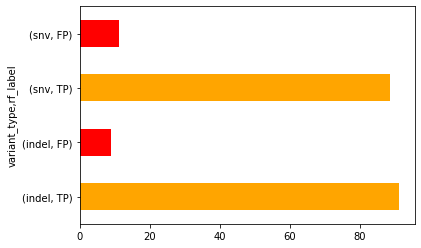

In [47]:
(df.groupby("variant_type")["rf_label"].value_counts(normalize=True)*100).plot(kind = 'barh',color=['orange', 'red'])


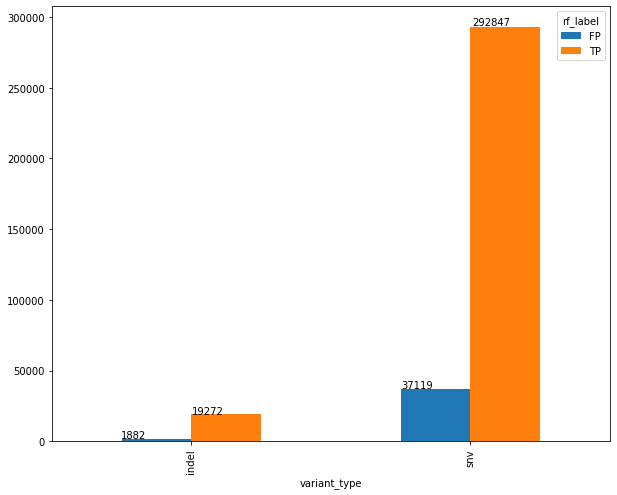

In [99]:
plt.title="Fic"
plt.rcParams["figure.figsize"] = [10, 8]
ax=df.groupby('variant_type').rf_label.value_counts().unstack().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


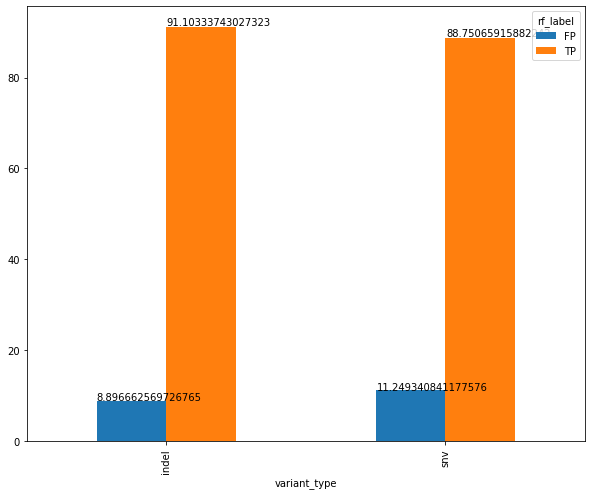

In [100]:

plt.rcParams["figure.figsize"] = [10, 8]
ax= (df.groupby('variant_type').rf_label.value_counts(normalize=True)*100).unstack().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

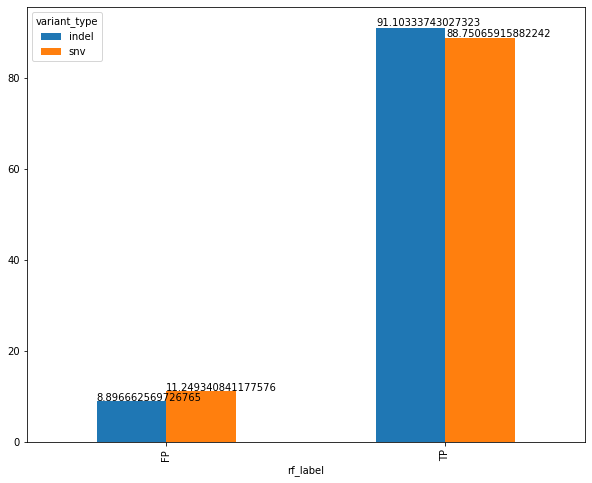

In [101]:

plt.rcParams["figure.figsize"] = [10, 8]
ax= (df.groupby('variant_type').rf_label.value_counts(normalize=True)*100).unstack(0).plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

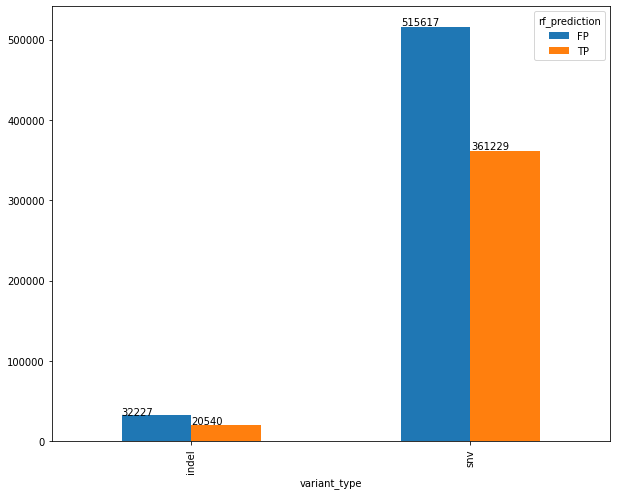

In [6]:
plt.title="Fic"
plt.rcParams["figure.figsize"] = [10, 8]
ax=df.groupby('variant_type').rf_prediction.value_counts().unstack().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

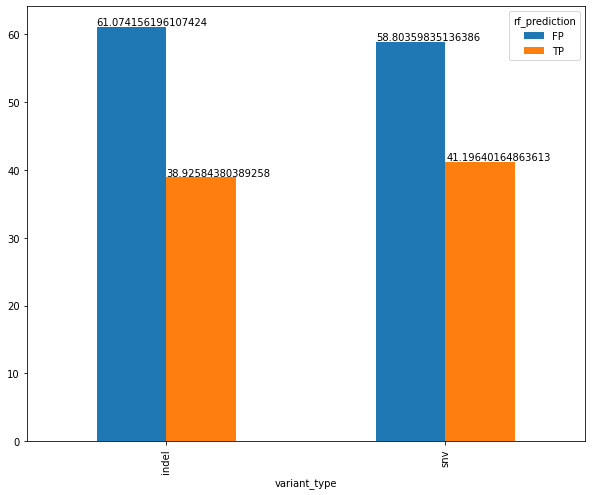

In [7]:
plt.rcParams["figure.figsize"] = [10, 8]
ax= (df.groupby('variant_type').rf_prediction.value_counts(normalize=True)*100).unstack().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [102]:
df.head()

,locus,alleles,a_index,was_split,InbreedingCoeff,variant_type,allele_type,n_alt_alleles,was_mixed,has_star,...,rf_train,rf_label,rf_test,rf_probability,rf_prediction,ac_raw,ac,filters,rf_positive_label,rf_negative_label
0,chr1:13024,"[""G"",""A""]",1,False,-0.1473,snv,snv,1,False,False,...,True,FP,False,0.31562,FP,1,1,"[""AC0"",""RF""]",False,True
1,chr1:13087,"[""A"",""G""]",1,False,-0.1264,snv,snv,1,False,False,...,NaN,NaN,False,0.31719,FP,1,1,"[""RF""]",False,False
2,chr1:13176,"[""G"",""T""]",1,False,-0.1202,snv,snv,1,False,False,...,True,FP,False,0.31719,FP,1,1,"[""AC0"",""RF""]",False,True
3,chr1:13216,"[""C"",""G""]",1,False,-0.0865,snv,snv,1,False,False,...,True,FP,False,0.35144,FP,1,1,"[""AC0"",""RF""]",False,True
4,chr1:13248,"[""C"",""G""]",1,False,-0.0823,snv,snv,1,False,False,...,True,FP,False,0.37029,FP,1,1,"[""RF""]",False,True


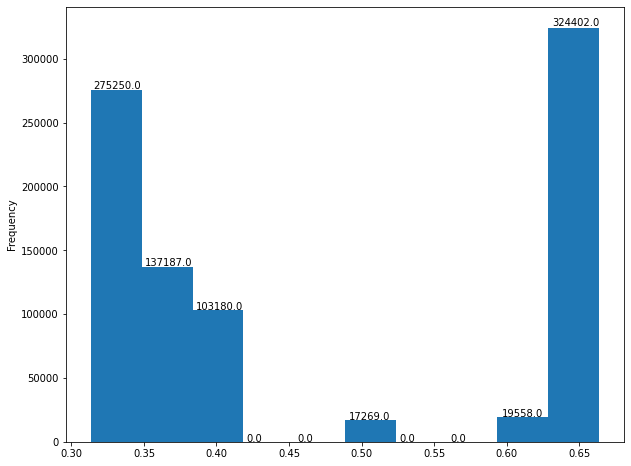

In [121]:
df1=df[df['variant_type']=='snv']
ax= (df1.rf_probability.plot.hist())
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

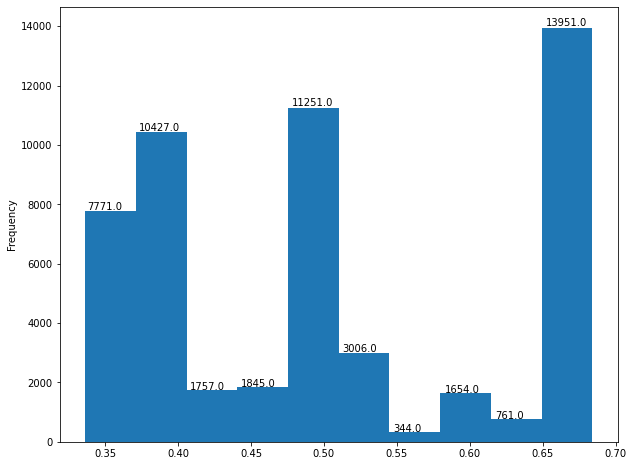

In [122]:
df1=df[df['variant_type']=='indel']
ax= (df1.rf_probability.plot.hist())
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [130]:
ht.globals.show()

.feature_medians,.variants_by_strata,.features_importance,.features,.test_results,.rf_hash,.rf_snv_cutoff.min_score,.rf_indel_cutoff.min_score
"dict<tuple(str), struct{a_index: int32, InbreedingCoeff: float64, n_alt_alleles: int32}>","dict<tuple(str), int64>","dict<str, float64>",array<str>,"array<struct{rf_prediction: str, rf_label: str, n: int32}>",str,float64,float64
"{(""indel""):(1,-3.28e-02,1)},(""snv""):(1,-1.65e-02,1)}}","{(""indel""):52767},(""snv""):876846}}","{""variant_type"":4.75e-02},""allele_type"":4.18e-02},""has_star"":0.00e+00},""I...","[""InbreedingCoeff"",""variant_type"",""allele_type"",""n_alt_alleles"",""was_mixe...","[(""FP"",""FP"",4501),(""FP"",""TP"",21389),(""TP"",""FP"",2264),(""TP"",""TP"",42193)]","""aa7a0685""",9.00e+01,8.00e+01


In [137]:
mt = hl.read_matrix_table(
        f'{temp_dir}/ddd-elgh-ukbb/filtering/Sanger_cohorts_chr1-20-XY_sampleQC_FILTERED.mt')

In [139]:
mt.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
    'cohort': str
    'known_pop': str
    'gVCF': str
----------------------------------------
Row fields:
    'locus': locus<GRCh38>
    'alleles': array<str>
    'rsid': str
    'qual': float64
    'filters': set<str>
    'info': struct {
        AC: array<int32>, 
        AF: array<float64>, 
        AN: int32, 
        AS_BaseQRankSum: array<float64>, 
        AS_FS: array<float64>, 
        AS_InbreedingCoeff: array<float64>, 
        AS_MQ: array<float64>, 
        AS_MQRankSum: array<float64>, 
        AS_QD: array<float64>, 
        AS_ReadPosRankSum: array<float64>, 
        AS_SOR: array<float64>, 
        BaseQRankSum: float64, 
        DB: bool, 
        DP: int32, 
        DS: bool, 
        END: int32, 
        ExcessHet: float64, 
        FS: float64, 
        InbreedingCoeff: float64, 
        MLEAC: array<int32>, 
        MLEAF: array<f

In [141]:
mt1=mt.annotate_rows(rf_label=ht[mt.row_key].rf_label)

In [142]:
mt1.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
    'cohort': str
    'known_pop': str
    'gVCF': str
----------------------------------------
Row fields:
    'locus': locus<GRCh38>
    'alleles': array<str>
    'rsid': str
    'qual': float64
    'filters': set<str>
    'info': struct {
        AC: array<int32>, 
        AF: array<float64>, 
        AN: int32, 
        AS_BaseQRankSum: array<float64>, 
        AS_FS: array<float64>, 
        AS_InbreedingCoeff: array<float64>, 
        AS_MQ: array<float64>, 
        AS_MQRankSum: array<float64>, 
        AS_QD: array<float64>, 
        AS_ReadPosRankSum: array<float64>, 
        AS_SOR: array<float64>, 
        BaseQRankSum: float64, 
        DB: bool, 
        DP: int32, 
        DS: bool, 
        END: int32, 
        ExcessHet: float64, 
        FS: float64, 
        InbreedingCoeff: float64, 
        MLEAC: array<int32>, 
        MLEAF: array<f

In [146]:
binned_ht = hl.read_table(f'{temp_dir}/ddd-elgh-ukbb/variant_qc/models/aa7a0685/rf_result_quantile_bins.ht')

In [148]:
binned_ht.describe()

----------------------------------------
Global fields:
    'feature_medians': dict<tuple (
        str
    ), struct {
        a_index: int32, 
        InbreedingCoeff: float64, 
        n_alt_alleles: int32
    }> 
    'variants_by_strata': dict<tuple (
        str
    ), int64> 
    'features_importance': dict<str, float64> 
    'features': array<str> 
    'test_results': array<struct {
        rf_prediction: str, 
        rf_label: str, 
        n: int32
    }> 
    'rf_hash': str 
    'feature_medians_1': dict<tuple (
        str
    ), struct {
        a_index: int32, 
        InbreedingCoeff: float64, 
        n_alt_alleles: int32
    }> 
    'variants_by_strata_1': dict<tuple (
        str
    ), int64> 
    'features_importance_1': dict<str, float64> 
    'features_1': array<str> 
    'test_results_1': array<struct {
        rf_prediction: str, 
        rf_label: str, 
        n: int32
    }> 
    'rf_hash_1': str 
    'bin_stats': struct {
        adj_singleton_bin: struct {


In [150]:
binned_ht = binned_ht.filter(binned_ht.snv, keep=True)

In [162]:
binned_ht.flatten().export(f'{temp_dir}/ddd-elgh-ukbb/variant_qc/models/aa7a0685/binned_ht_table.tsv.bgz')

2020-10-13 09:42:14 Hail: INFO: merging 500 files totalling 24.6M...
2020-10-13 09:42:16 Hail: INFO: while writing:
    file:///home/ubuntu/data/tmp/ddd-elgh-ukbb/variant_qc/models/aa7a0685/binned_ht_table.tsv.bgz
  merge time: 1.601s


In [164]:
df2=pd.read_csv(f'{temp_dir}/ddd-elgh-ukbb/variant_qc/models/aa7a0685/binned_ht_table.tsv.bgz', compression='gzip',sep="\t")

/home/ubuntu/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19,24,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
df2.head()

,locus,alleles,a_index,was_split,InbreedingCoeff,variant_type,allele_type,n_alt_alleles,was_mixed,has_star,...,singleton,snv,adj_singleton_bin,adj_biallelic_bin,adj_biallelic_singleton_bin,adj_bin,bin,biallelic_bin,singleton_bin,biallelic_singleton_bin
0,chr1:13024,"[""G"",""A""]",1,False,-0.1473,snv,snv,1,False,False,...,True,True,88,86,87,88,98,87,94,96
1,chr1:13087,"[""A"",""G""]",1,False,-0.1264,snv,snv,1,False,False,...,True,True,95,94,97,96,97,96,94,97
2,chr1:13176,"[""G"",""T""]",1,False,-0.1202,snv,snv,1,False,False,...,True,True,97,97,97,96,96,96,95,95
3,chr1:13216,"[""C"",""G""]",1,False,-0.0865,snv,snv,1,False,False,...,True,True,95,95,96,95,95,96,96,95
4,chr1:13248,"[""C"",""G""]",1,False,-0.0823,snv,snv,1,False,False,...,True,True,95,95,95,94,94,94,95,95


AttributeError: 'Series' object has no attribute 'patches'

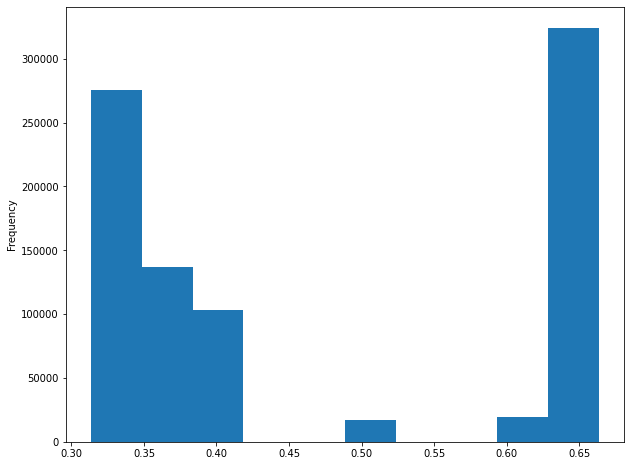

In [173]:
plt.rcParams["figure.figsize"] = [10, 8]
ax= (df2.groupby('variant_type').score).plot.hist()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [159]:
#dp_hist = binned_ht.aggregate_entries(hl.expr.aggregators.hist(mt.DP, 0, 30, 30))
p = hl.plot.histogram(binned_ht.score, legend='Score', title='Score')
show(p)